In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [25]:
from keras.datasets import fashion_mnist
from keras import Sequential, Input
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import to_categorical

In [26]:
seed=42
np.random.seed(seed)
tf.random.set_seed(seed)

In [27]:
(X_train, Y_class_train), (X_test, Y_class_test) = fashion_mnist.load_data()

In [28]:
print("Study-Set Image : %d"%(X_train.shape[0])) #60000
print("Test-Set Image : %d"%(X_test.shape[0])) #10000

Study-Set Image : 60000
Test-Set Image : 10000


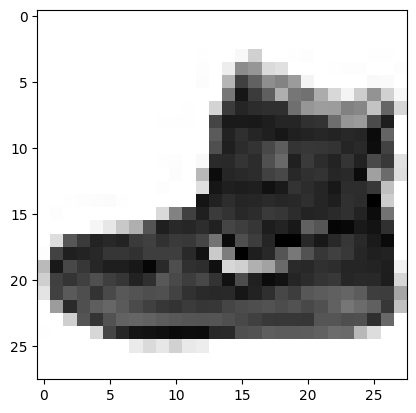

In [29]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [30]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%d\t"%i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	13	73	0	0	1	4	0	0	0	0	1	1	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	0	36	136	127	62	54	0	0	0	1	3	4	0	0	3	
0	0	0	0	0	0	0	0	0	0	0	0	6	0	102	204	176	134	144	123	23	0	0	0	0	12	10	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	155	236	207	178	107	156	161	109	64	23	77	130	72	15	
0	0	0	0	0	0	0	0	0	0	0	1	0	69	207	223	218	216	216	163	127	121	122	146	141	88	172	66	
0	0	0	0	0	0	0	0	0	1	1	1	0	200	232	232	233	229	223	223	215	213	164	127	123	196	229	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	183	225	216	223	228	235	227	224	222	224	221	223	245	173	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	193	228	218	213	198	180	212	210	211	213	223	220	243	202	0	
0	0	0	0	0	0	0	0	0	1	3	0	12	219	220	212	218	192	169	227	208	218	224	212	226	197	209	52	
0	0	0	0	0	0	0	0	0	0	6	0	99	244	222	220	218	203	198	221	215	213	222	220	245	119	167	56	
0	0	0	0	0	0	0	0	0	4	0	0	55	236	228	230	22

In [31]:
X_train=X_train.reshape(X_train.shape[0],784)
X_train=X_train.astype('float64')
X_train=X_train/255
X_test=X_test.reshape(X_test.shape[0],
                      784).astype('float64')/255

In [32]:
print("class:%d"%(Y_class_train[0]))

class:9


In [33]:
Y_train=to_categorical(Y_class_train,10)
Y_test=to_categorical(Y_class_test,10)
print(Y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Relu + Softmax 

In [36]:
model1=Sequential()
model1.add(Input(shape=(784,)))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [37]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [39]:
MODEL1_DIR='./model1/'
if not os.path.exists(MODEL1_DIR):
    os.mkdir(MODEL1_DIR)

modelpath="./model1/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer=ModelCheckpoint(filepath=modelpath,
                             monitor='val_loss',verbose=1,save_best_only=True)
early__stopping_callback=EarlyStopping(monitor='val_loss',
                                       patience=10)

In [41]:
history1=model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),
                    epochs=30,batch_size=200,verbose=0,
                    callbacks=[early__stopping_callback,checkpointer])


Epoch 1: val_loss did not improve from 0.34719

Epoch 2: val_loss did not improve from 0.34719

Epoch 3: val_loss did not improve from 0.34719

Epoch 4: val_loss did not improve from 0.34719

Epoch 5: val_loss did not improve from 0.34719

Epoch 6: val_loss did not improve from 0.34719

Epoch 7: val_loss did not improve from 0.34719

Epoch 8: val_loss did not improve from 0.34719

Epoch 9: val_loss did not improve from 0.34719

Epoch 10: val_loss did not improve from 0.34719


### 하이퍼 파라미터 조정

In [55]:
model2=Sequential()
model2.add(Input(shape=(784,)))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(10,activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True, clipnorm=1.0)
model2.compile(loss="categorical_crossentropy",
              optimizer=opt,metrics=['accuracy'])

MODEL2_DIR='./model2/'
if not os.path.exists(MODEL2_DIR):
    os.mkdir(MODEL2_DIR)

modelpath="./model2/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer=ModelCheckpoint(filepath=modelpath,
                             monitor='val_loss',verbose=1,save_best_only=True)
early__stopping_callback=EarlyStopping(monitor='val_loss',
                                       patience=10)

history2=model2.fit(X_train,Y_train,validation_data=(X_test,Y_test),
                    epochs=30,batch_size=100,verbose=0,
                    callbacks=[early__stopping_callback,checkpointer])


Epoch 1: val_loss improved from None to 0.42010, saving model to ./model2/01-0.4201.keras

Epoch 2: val_loss improved from 0.42010 to 0.38315, saving model to ./model2/02-0.3832.keras

Epoch 2: val_loss improved from 0.42010 to 0.38315, saving model to ./model2/02-0.3832.keras

Epoch 3: val_loss improved from 0.38315 to 0.36813, saving model to ./model2/03-0.3681.keras

Epoch 3: val_loss improved from 0.38315 to 0.36813, saving model to ./model2/03-0.3681.keras

Epoch 4: val_loss improved from 0.36813 to 0.36036, saving model to ./model2/04-0.3604.keras

Epoch 4: val_loss improved from 0.36813 to 0.36036, saving model to ./model2/04-0.3604.keras

Epoch 5: val_loss improved from 0.36036 to 0.35166, saving model to ./model2/05-0.3517.keras

Epoch 5: val_loss improved from 0.36036 to 0.35166, saving model to ./model2/05-0.3517.keras

Epoch 6: val_loss improved from 0.35166 to 0.35125, saving model to ./model2/06-0.3513.keras

Epoch 6: val_loss improved from 0.35166 to 0.35125, saving mod

In [57]:
print('\n Test Accuracy: %.4f'%(model1.evaluate(X_test,Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8870 - loss: 0.3867
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8870 - loss: 0.3867

 Test Accuracy: 0.8870

 Test Accuracy: 0.8870


In [58]:
print('\n Test Accuracy: %.4f'%(model2.evaluate(X_test,Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8754 - loss: 0.3967

 Test Accuracy: 0.8754
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8754 - loss: 0.3967

 Test Accuracy: 0.8754


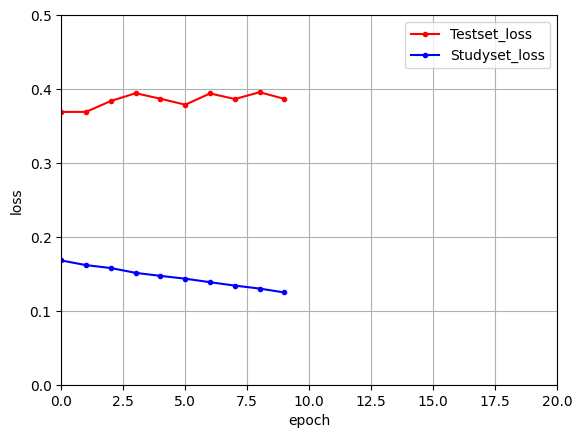

In [61]:
y_vloss=history1.history['val_loss']
y_loss=history1.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Studyset_loss')
plt.legend(loc='upper right')
plt.axis([0,20,0,0.5])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

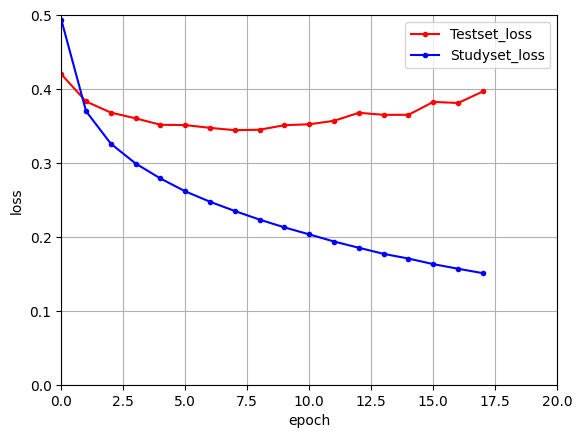

In [62]:
y_vloss=history2.history['val_loss']
y_loss=history2.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Studyset_loss')
plt.legend(loc='upper right')
plt.axis([0,20,0,0.5])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [63]:
index=2025
image=X_test[index]
label=Y_class_test[index]

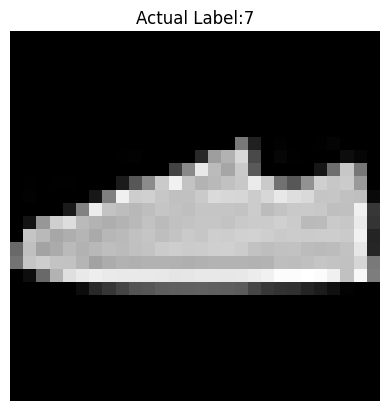

In [64]:
plt.imshow(image.reshape(28,28),cmap='gray')
plt.title(f"Actual Label:{label}")
plt.axis('off')
plt.show()

In [65]:
prediction=model1.predict(image.reshape(1,784))
predicted_label=prediction.argmax()
print("Predicted Label:",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Label: 7
Predicted Label: 7


In [67]:
prediction=model2.predict(image.reshape(1,784))
predicted_label=prediction.argmax()
print("Predicted Label:",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: 7
Predicted Label: 7
